# Running k_means clustering on song features dataset

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [79]:
df = pd.read_csv('audio_features_instrumentals.csv')

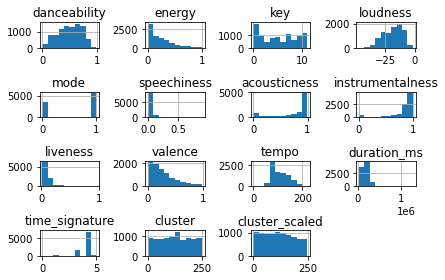

In [97]:
df.hist()
plt.tight_layout()

In [80]:
df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [81]:
# making id into index

df.index = df['id']

In [82]:
df.rename_axis(None, inplace=True)

In [83]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [84]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
4i5Q2kAQXW8yN3I8oF0S6y,0.716,0.238,0,-19.214,1,0.0357,0.952,0.874,0.0990,0.0867,93.030,audio_features,4i5Q2kAQXW8yN3I8oF0S6y,spotify:track:4i5Q2kAQXW8yN3I8oF0S6y,https://api.spotify.com/v1/tracks/4i5Q2kAQXW8y...,https://api.spotify.com/v1/audio-analysis/4i5Q...,192419,4
7GUCn1kZEPWsec3ql7gYmf,0.723,0.289,1,-18.972,1,0.0454,0.871,0.766,0.0939,0.4730,93.010,audio_features,7GUCn1kZEPWsec3ql7gYmf,spotify:track:7GUCn1kZEPWsec3ql7gYmf,https://api.spotify.com/v1/tracks/7GUCn1kZEPWs...,https://api.spotify.com/v1/audio-analysis/7GUC...,141716,4
3bmBkt3iLFJWptwYmdZUYd,0.785,0.356,1,-15.437,1,0.0359,0.891,0.919,0.1080,0.2050,115.869,audio_features,3bmBkt3iLFJWptwYmdZUYd,spotify:track:3bmBkt3iLFJWptwYmdZUYd,https://api.spotify.com/v1/tracks/3bmBkt3iLFJW...,https://api.spotify.com/v1/audio-analysis/3bmB...,153362,4
0ykGfuv3McDRCa4KwoONvd,0.602,0.256,5,-14.836,1,0.0405,0.881,0.809,0.0931,0.2060,141.887,audio_features,0ykGfuv3McDRCa4KwoONvd,spotify:track:0ykGfuv3McDRCa4KwoONvd,https://api.spotify.com/v1/tracks/0ykGfuv3McDR...,https://api.spotify.com/v1/audio-analysis/0ykG...,222169,4
2jxC87YsC8jzlR3F5dBrgD,0.585,0.290,10,-16.978,0,0.0557,0.972,0.887,0.1270,0.3970,169.894,audio_features,2jxC87YsC8jzlR3F5dBrgD,spotify:track:2jxC87YsC8jzlR3F5dBrgD,https://api.spotify.com/v1/tracks/2jxC87YsC8jz...,https://api.spotify.com/v1/audio-analysis/2jxC...,141166,4


In [85]:
df_numeric = df.drop(['type', 'id', 'uri','track_href', 'analysis_url'], axis=1)

In [86]:
kmeans = KMeans(n_clusters=250)
cluster = kmeans.fit(df_numeric)

In [87]:
#cluster.cluster_centers_

In [88]:
# trying again with scaling

In [89]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df_numeric)
df_scaled_df = pd.DataFrame(df_scaled, columns=df_numeric.columns)

In [90]:
df_scaled_df.index = df['id']
df_scaled_df.rename_axis(None, inplace=True)

In [91]:
kmeans = KMeans(n_clusters=250)
cluster_scaled = kmeans.fit(df_scaled_df)

In [92]:
#cluster_scaled.cluster_centers_

In [93]:
df['cluster'] = cluster.labels_
df['cluster_scaled'] = cluster_scaled.labels_

In [95]:
df[df['cluster_scaled']== 8]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster,cluster_scaled
6uudeEvl6t5WrFgobojt3D,0.253,0.766,4,-16.011,1,0.0329,0.000117,0.892,0.957,0.726,168.914,audio_features,6uudeEvl6t5WrFgobojt3D,spotify:track:6uudeEvl6t5WrFgobojt3D,https://api.spotify.com/v1/tracks/6uudeEvl6t5W...,https://api.spotify.com/v1/audio-analysis/6uud...,150093,4,87,8
0Xz3DTcdZI01mjKfNZrsC1,0.604,0.964,8,-4.713,1,0.0330,0.000160,0.611,0.858,0.078,127.929,audio_features,0Xz3DTcdZI01mjKfNZrsC1,spotify:track:0Xz3DTcdZI01mjKfNZrsC1,https://api.spotify.com/v1/tracks/0Xz3DTcdZI01...,https://api.spotify.com/v1/audio-analysis/0Xz3...,157031,4,116,8
3Af7K6rJ85E9eS0yy8eRNA,0.706,0.934,3,-5.504,0,0.0474,0.024300,0.922,0.876,0.452,128.016,audio_features,3Af7K6rJ85E9eS0yy8eRNA,spotify:track:3Af7K6rJ85E9eS0yy8eRNA,https://api.spotify.com/v1/tracks/3Af7K6rJ85E9...,https://api.spotify.com/v1/audio-analysis/3Af7...,264760,4,208,8
1ZoHuLxbQho7N5ioKA6Hx1,0.623,0.998,5,-1.436,1,0.0364,0.034200,0.853,0.862,0.679,127.988,audio_features,1ZoHuLxbQho7N5ioKA6Hx1,spotify:track:1ZoHuLxbQho7N5ioKA6Hx1,https://api.spotify.com/v1/tracks/1ZoHuLxbQho7...,https://api.spotify.com/v1/audio-analysis/1ZoH...,269907,4,8,8
5lByoyTJti3jYo22bLQKOH,0.643,0.997,11,-1.656,1,0.0483,0.002050,0.672,0.659,0.555,128.004,audio_features,5lByoyTJti3jYo22bLQKOH,spotify:track:5lByoyTJti3jYo22bLQKOH,https://api.spotify.com/v1/tracks/5lByoyTJti3j...,https://api.spotify.com/v1/audio-analysis/5lBy...,234773,4,61,8
2uUNTBmq2VBW1UMJcAqOEn,0.636,0.438,9,-12.560,1,0.0707,0.374000,0.837,0.873,0.915,149.981,audio_features,2uUNTBmq2VBW1UMJcAqOEn,spotify:track:2uUNTBmq2VBW1UMJcAqOEn,https://api.spotify.com/v1/tracks/2uUNTBmq2VBW...,https://api.spotify.com/v1/audio-analysis/2uUN...,108800,4,3,8
4IBwgoDpNG2p7EouVtFw0E,0.744,0.756,9,-7.720,1,0.1300,0.095400,0.698,0.893,0.364,160.981,audio_features,4IBwgoDpNG2p7EouVtFw0E,spotify:track:4IBwgoDpNG2p7EouVtFw0E,https://api.spotify.com/v1/tracks/4IBwgoDpNG2p...,https://api.spotify.com/v1/audio-analysis/4IBw...,220865,4,157,8
6JYYe9tJOcrEtQE2BY5Jzo,0.649,0.923,2,-5.501,1,0.0520,0.052000,0.788,0.879,0.865,140.034,audio_features,6JYYe9tJOcrEtQE2BY5Jzo,spotify:track:6JYYe9tJOcrEtQE2BY5Jzo,https://api.spotify.com/v1/tracks/6JYYe9tJOcrE...,https://api.spotify.com/v1/audio-analysis/6JYY...,288000,4,129,8
2yuBW2Empy4JejMW4UCkdG,0.631,0.759,1,-9.739,1,0.0558,0.448000,0.893,0.884,0.482,128.007,audio_features,2yuBW2Empy4JejMW4UCkdG,spotify:track:2yuBW2Empy4JejMW4UCkdG,https://api.spotify.com/v1/tracks/2yuBW2Empy4J...,https://api.spotify.com/v1/audio-analysis/2yuB...,146000,4,219,8


In [98]:
k = range(50, 400)

inertia = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=101)
    kmeans.fit(df_scaled_df)
    
    inertia.append(kmeans.inertia_)


Text(0.5, 1.0, 'elbow chart')

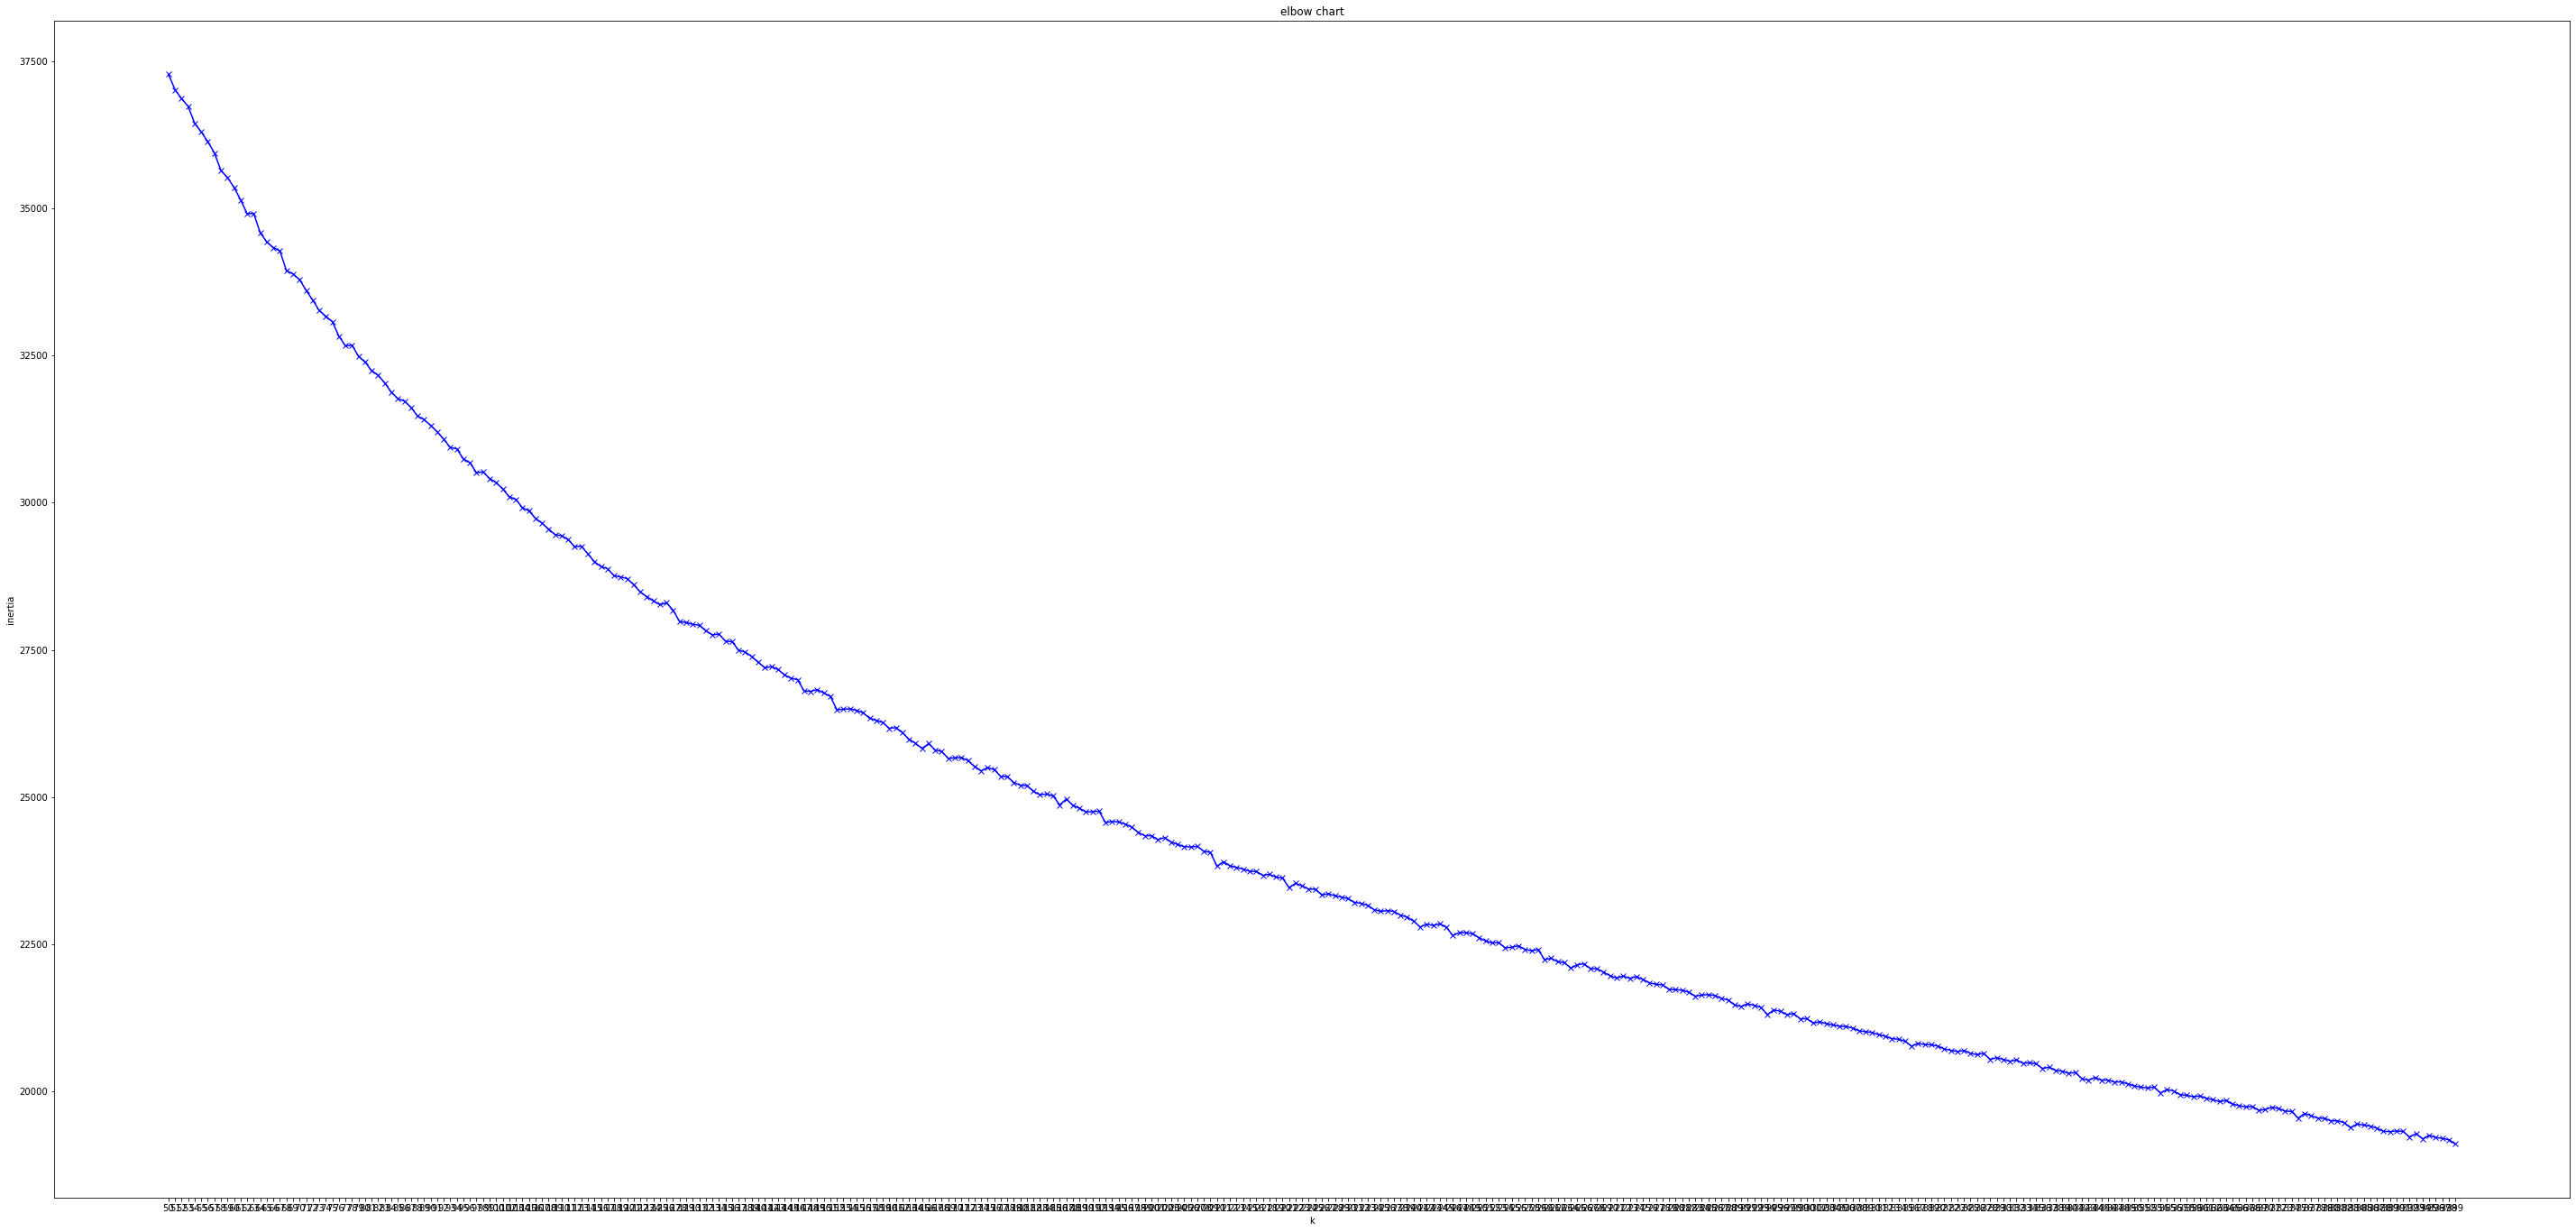

In [102]:
#plot the inertia

plt.figure(figsize=(50,24))
plt.plot(k, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.title('elbow chart')

In [105]:
from sklearn.metrics import silhouette_score


Text(0, 0.5, 'silhouette score')

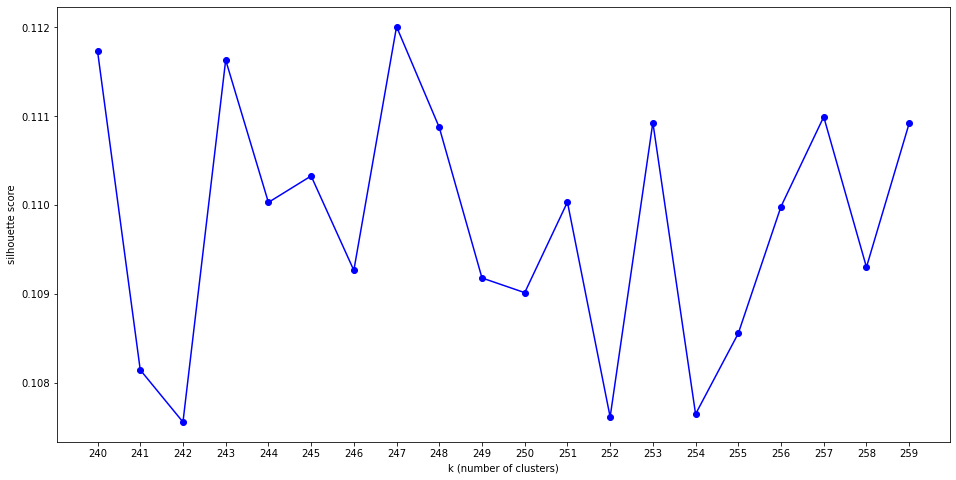

In [106]:

K = range(240, 260)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(df_scaled_df)
    silhouettes.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))
    
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')